#A Notebook to practice ML basics

In this practicum, we practice some basic excercies in machine learning to warm up for more serious work.


In [41]:
#Import packages and define a few custom functions
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
import graphviz
import pylab
import matplotlib.pyplot as plt
import random
from sklearn import datasets

cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm

## Training: Building a Decision Tree Classifier

The cell below loads a standard sklearn toy dataset. It trains a decision tree classifier.
We provide two classification datasets that could be applied to the decision tree algorithms.


Before training your classifier, run the cell below to take a look at the dataset.

In [2]:

iris = datasets.load_iris()
print(iris.keys())
label_name = "type of iris plant"
print(iris.target_names)
labels = [iris.target_names[x] for x in iris.target]

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
['setosa' 'versicolor' 'virginica']


Let's define and fit a simple tree classifier

In [3]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, labels)

## Visualizing a Decision Tree

The following cell will generate a visualization of the decision tree.

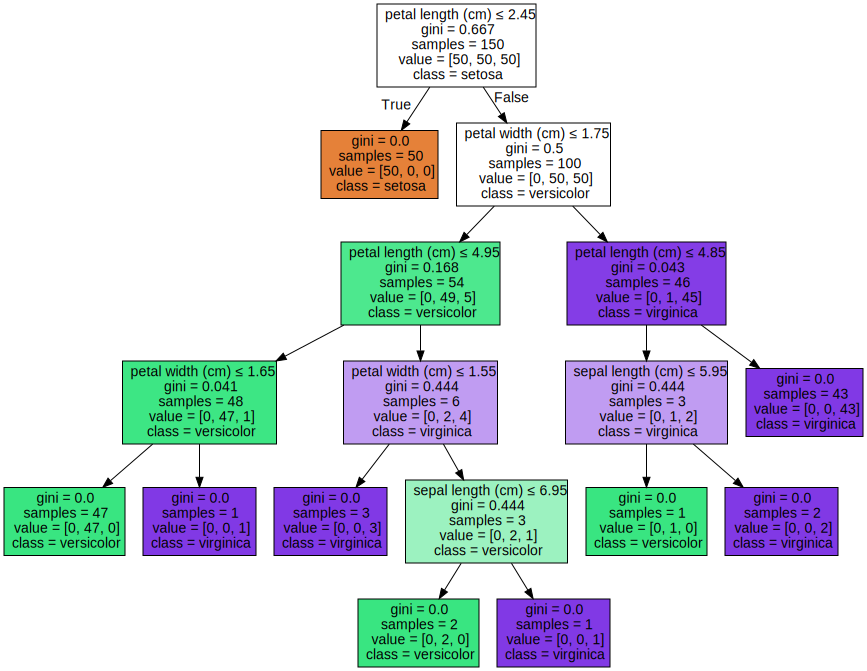

In [4]:
dot_data = tree.export_graphviz(clf, out_file=None,max_depth=5, \
feature_names=iris.feature_names,class_names=clf.classes_,label='all', \
filled=True,special_characters=True)

graph = graphviz.Source(dot_data)
graph

## Evaluating the Accuracy of a Decision Tree Classifier¶

The following cell will run cross-validation (k-fold, where k=5) to evaluate your decision tree classifier.

K Fold Cross-Validation is used to estimate prediction error. The dataset is randomly divided into K folds. The first fold acts as the validation set while the method is fit on remaining K-1 folds. Mean Squared Error is calculated on the observations from the held-out fold. The process is repeated K times, taking a different part each time.

In [5]:
n_foldCV = 5
clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(iris.data,iris.target)
scores = cross_val_score(clf, iris.data, labels, cv=n_foldCV)

The following cell will output the accuracy score for each fold and the accuracy estimate of the model under 95% confidence interval.

In [6]:
print("Scores:")
[print(score) for score in scores]
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Scores:
0.9333333333333333
0.9666666666666667
0.9
0.8666666666666667
1.0
Accuracy: 0.93 (+/- 0.09)


Can you calculate the precision, recall and f-1 scores? Please write the code in the following block

In [7]:
#your code here

Let's visualize the data by two feauters - you can see that this is a pretty easy task

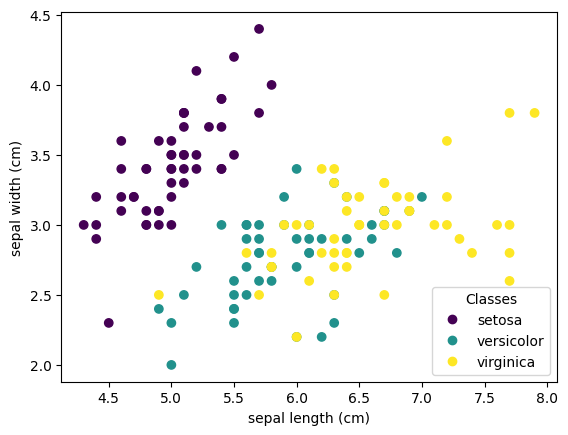

In [8]:

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

Now, let's try to do the same task with a kNN classifier

In [9]:
n_foldCV = 5
neigh = KNeighborsClassifier(n_neighbors=1)

neigh = neigh.fit(iris.data,iris.target)
scores = cross_val_score(neigh, iris.data, labels, cv=n_foldCV)
print("Scores:")
[print(score) for score in scores]
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Scores:
0.9666666666666667
0.9666666666666667
0.9333333333333333
0.9333333333333333
1.0
Accuracy: 0.96 (+/- 0.05)


Let's add some noise and see what happens

In [10]:
iris.data += np.random.normal(0, .5, iris.data.shape)

Let's repeat the same task with the noisy data

In [11]:
n_foldCV = 5
neigh = KNeighborsClassifier(n_neighbors=10)

neigh = neigh.fit(iris.data,iris.target)
scores = cross_val_score(neigh, iris.data, labels, cv=n_foldCV)
print("Scores:")
[print(score) for score in scores]
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Scores:
0.9
0.8666666666666667
0.8333333333333334
0.9
0.9
Accuracy: 0.88 (+/- 0.05)


Now let's visualize the decision boundaries of kNN; play with the valye of k in kNN and see what happens

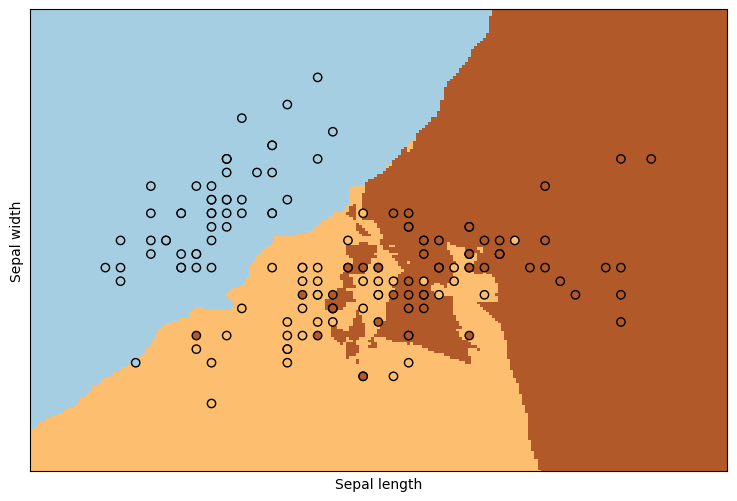

In [12]:
# Code source: Gael Varoqueux
# Modified for Documentation merge by Jaques Grobler
# License: BSD


# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2] # we only take the first two features.
Y = iris.target

h = .02 # step size in the mesh

knn=KNeighborsClassifier(n_neighbors=5)

# we create an instance of Neighbours Classifier and fit the data.
knn.fit(X, Y)

# Plot the decision boundary. For that, we will asign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(9, 6))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Plot also the training points
plt.scatter(X[:,0], X[:,1],c=Y, edgecolors='black')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

Now let's try a different task. We generate some synthetic sequential data

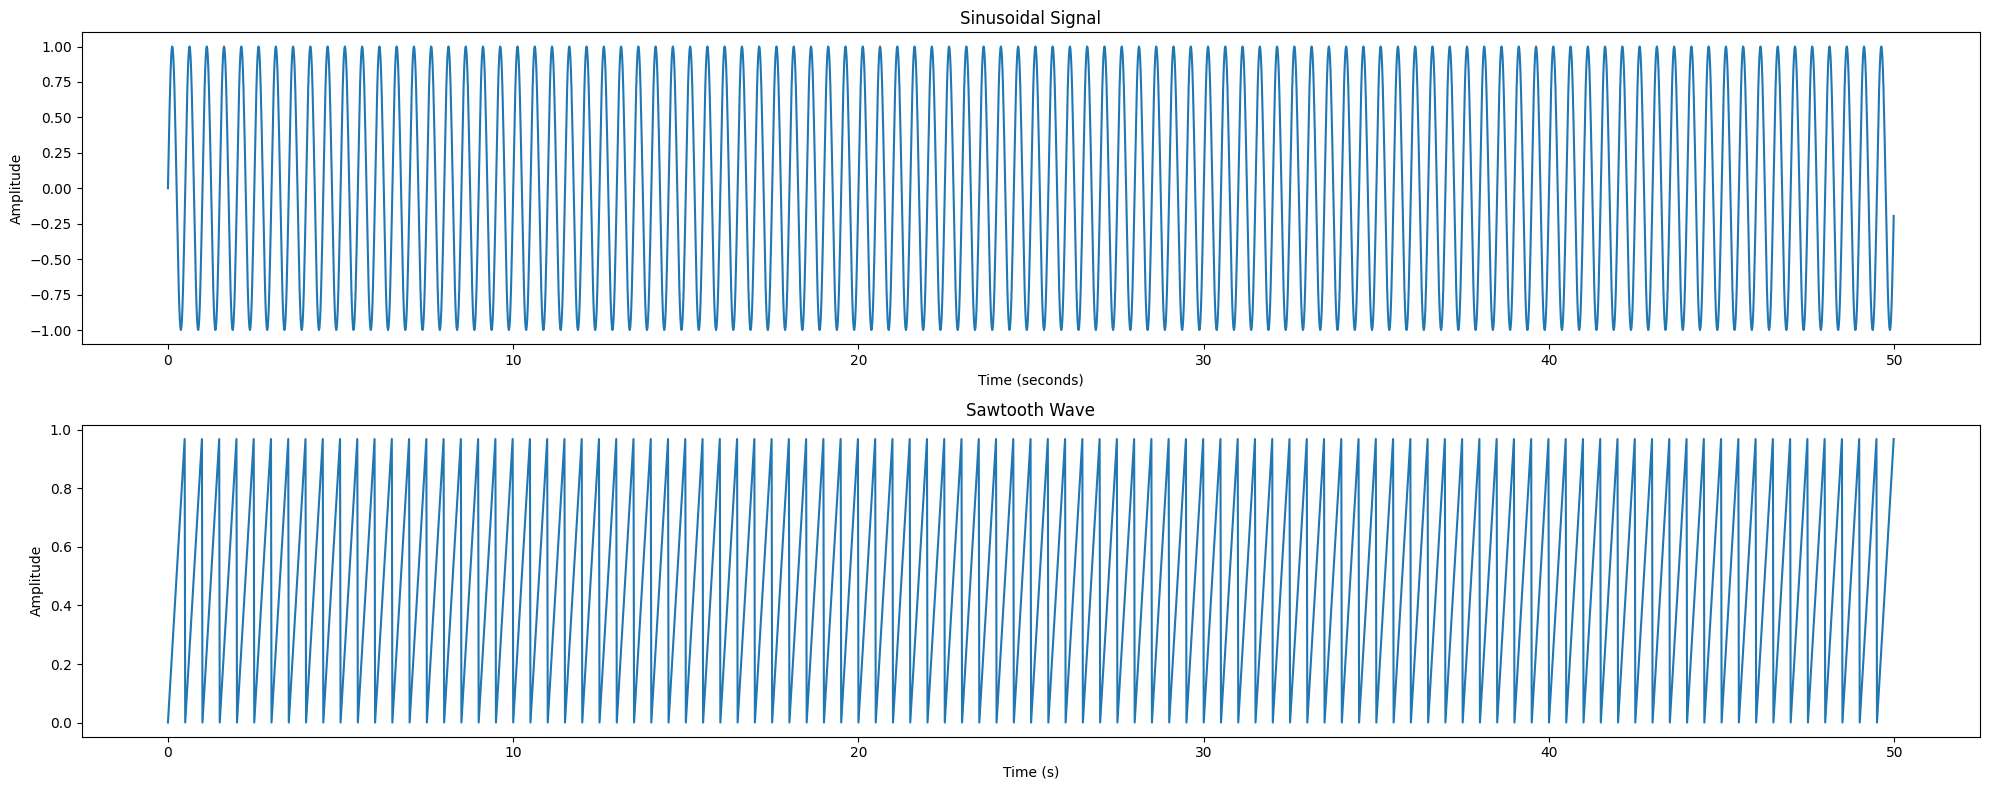

In [34]:
# Set parameters for the signal
frequency = 2  # Hz (can be adjusted as needed)
amplitude = 1  # (can be adjusted as needed)
duration = 50  # seconds (can be adjusted as needed)
sample_rate = 64  # Hz

# Generate time values for the signal
time = np.arange(0, duration, 1/sample_rate)

# Generate the sinusoidal signal
sine_wave = amplitude * np.sin(2 * np.pi * frequency * time)

fig, axs = plt.subplots(2, 1, figsize=(20, 8))
# Plot the sine wave
axs[0].plot(time, sine_wave)
axs[0].set_xlabel("Time (seconds)")
axs[0].set_ylabel("Amplitude")
axs[0].set_title("Sinusoidal Signal")


# Generate sawtooth wave
sawtooth_wave = np.mod(time * frequency, 1)

# Plot the sawtooth wave
axs[1].plot(time, sawtooth_wave)
axs[1].set_xlabel("Time (s)")
axs[1].set_ylabel("Amplitude")
axs[1].set_title("Sawtooth Wave")
plt.tight_layout()

plt.show()

now let's generate some synthetic sequential samples from these two signals - we add some noise as well

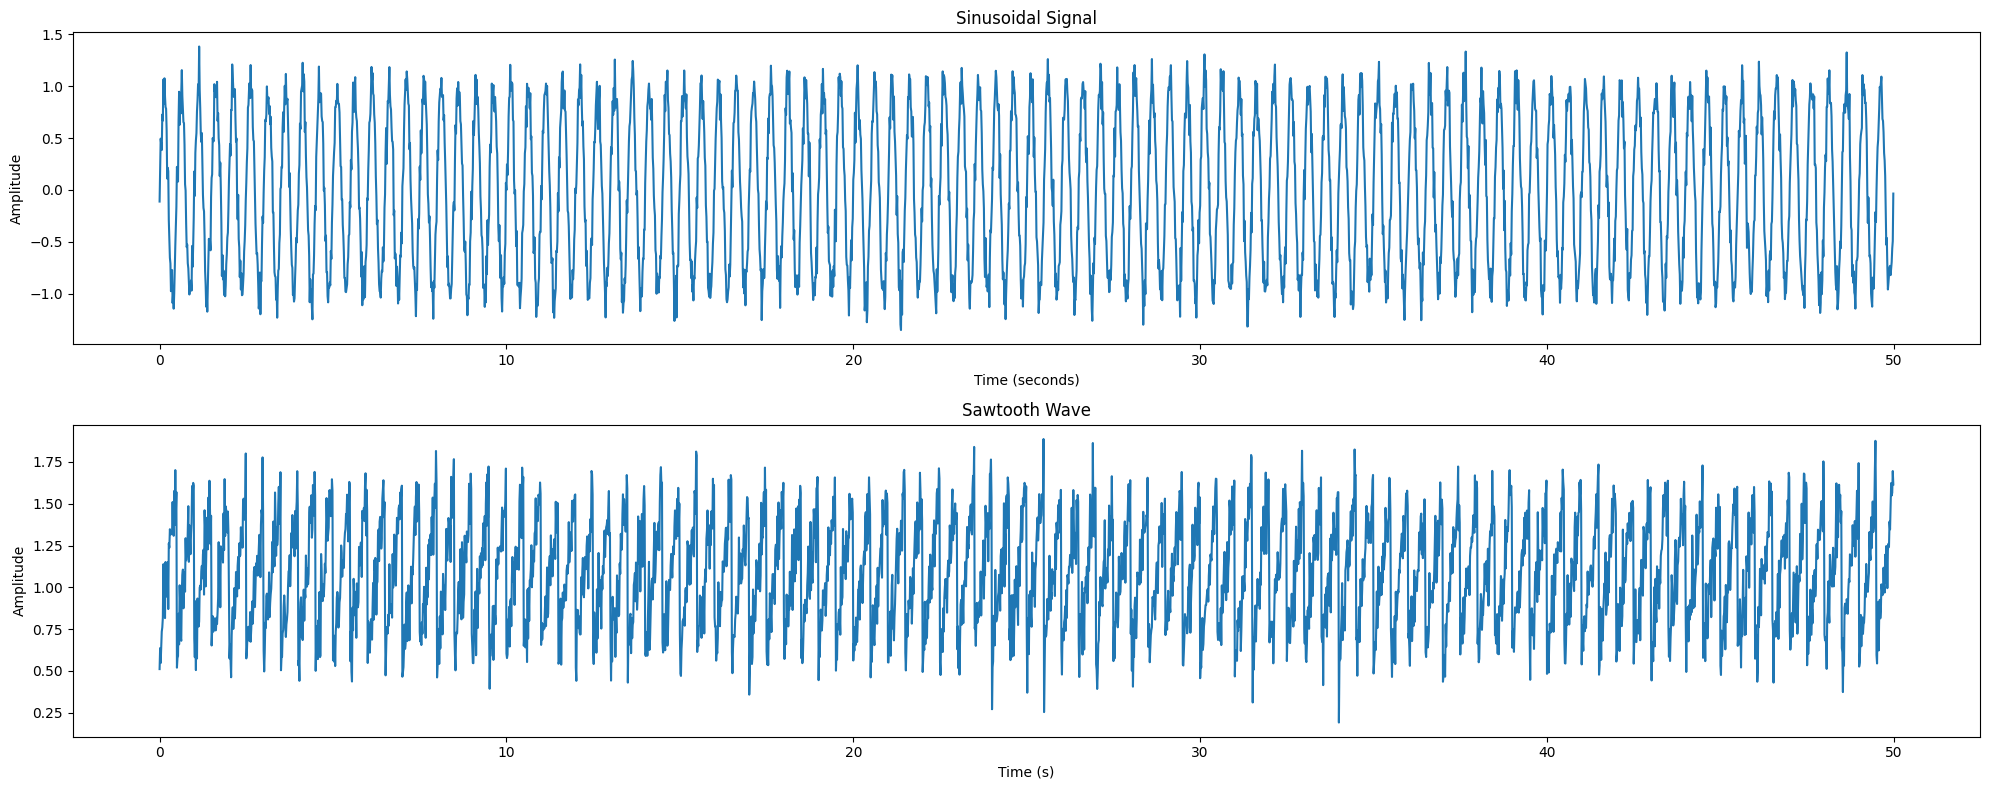

In [54]:
sine_wave += np.random.normal(0, .05, sine_wave.shape)
sawtooth_wave += np.random.normal(0.1, .05, sawtooth_wave.shape)
syn_seq_len = 100
n=200
fig, axs = plt.subplots(2, 1, figsize=(20, 8))
# Plot the sine wave
axs[0].plot(time, sine_wave)
axs[0].set_xlabel("Time (seconds)")
axs[0].set_ylabel("Amplitude")
axs[0].set_title("Sinusoidal Signal")

# Plot the sawtooth wave
axs[1].plot(time, sawtooth_wave)
axs[1].set_xlabel("Time (s)")
axs[1].set_ylabel("Amplitude")
axs[1].set_title("Sawtooth Wave")
plt.tight_layout()

plt.show()

sine_samples = np.zeros((n, syn_seq_len))
sawtooth_samples =  sine_samples.copy()
for i in range(n):
  j = random.randint(0,len(sine_wave)-syn_seq_len)
  sine_samples[i,:]=sine_wave[j:j+syn_seq_len]
  k = random.randint(0,len(sawtooth_wave)-syn_seq_len)
  sawtooth_samples[i,:]=sawtooth_wave[k:k+syn_seq_len]

samples = np.concatenate((sine_samples,sawtooth_samples),axis=0)
labels = np.zeros((2*n,))
labels[n:] = 1
#let's shuffle them and split
idx = np.arange(2*n,dtype=np.int32)
np.random.shuffle(idx)
samples = samples[idx,:]
labels = labels[idx]

#set train and test set indices
train_set =  np.arange(np.round(2*n*0.75),dtype=np.int32)
test_set = np.arange(np.round(2*n*0.75),2*n,dtype=np.int32)


In [55]:
train_set

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Model definition
model = Sequential([
    LSTM(32, input_shape=(syn_seq_len, 1), return_sequences=False),  # One LSTM layer
    Dense(1, activation='sigmoid')  # Output layer for classification
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model (assuming you have your training data ready)
model.fit(samples[train_set,:], labels[train_set], epochs=10, batch_size=32)

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(samples[test_set,:], labels[test_set])
print('Test accuracy:', test_acc)


Epoch 1/10
10/10 [==============================] - 4s 32ms/step - loss: 0.6226 - accuracy: 0.7967
Epoch 2/10
10/10 [==============================] - 0s 30ms/step - loss: 0.5535 - accuracy: 0.8067
Epoch 3/10
10/10 [==============================] - 0s 30ms/step - loss: 0.4491 - accuracy: 0.8133
Epoch 4/10
10/10 [==============================] - 0s 33ms/step - loss: 0.2983 - accuracy: 0.9067
Epoch 5/10
10/10 [==============================] - 0s 31ms/step - loss: 0.1427 - accuracy: 0.9967
Epoch 6/10
10/10 [==============================] - 0s 29ms/step - loss: 0.0692 - accuracy: 1.0000
Epoch 7/10
10/10 [==============================] - 0s 32ms/step - loss: 0.0436 - accuracy: 1.0000
Epoch 8/10
10/10 [==============================] - 0s 30ms/step - loss: 0.0311 - accuracy: 1.0000
Epoch 9/10
10/10 [==============================] - 0s 30ms/step - loss: 0.0237 - accuracy: 1.0000
Epoch 10/10
4/4 [==============================] - 1s 11ms/step - loss: 0.0526 - accuracy: 0.9900
Test accura